# GPA PREDICTION MODELS BY AHMER WAQAR 


In [49]:
#Imported all the libraries which are needed
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
import matplotlib.pyplot as plt
import time
import math

In [50]:
#Dataset
Data = pd.read_csv("The_Grades_Dataset.csv")

In [51]:
#Checking for the null values
Data.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [52]:
#Filling the null values with the most repeated values of that particular column
Data.fillna(Data.mode().iloc[0],inplace = True)
Data.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [53]:
#Again checking the null values, if there are any?
Data.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [54]:
#saving preprocessed data set
Data.to_csv('PreProcessed_Dataset.csv', index=False)

In [55]:
# copying our dataset to Data_encoded to avoid any type of misshapen to our original dataset
Data_encoded = Data.copy()

# assigning grades numbers by using ordinal encoding technique
order_label = {"A+":15,"A":14,"A-":13,"B+":12,"B":11,"B-":10,"C+":8,"C":8,"C-":7,"D+":6,"D":5,"F":4,"I":3,"W":2,"WU":1}

#mapping the order_label values to each column value in our data dataset
for col in Data_encoded.columns:
     Data_encoded[col] =  Data_encoded[col].map(order_label)
# Data_encoded.head(10)

#Extracting the independent features 
Data_encoded= Data_encoded.drop("MT-442" , axis=1).iloc[:,1:-8]


#Saving the data set to see the changes after encoding
Data_encoded.to_csv('Encoded.csv', index=False)

**USING LINEAR REGRESSION FOR MODEL 1**

In [56]:
#Passing Features to x1 and assigning our target to y1
x1 = Data_encoded.iloc[:, 0:11]

#here I have pick the GPA Column from our original dataset
y1 = Data['CGPA']
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=0)
Lin_reg = LinearRegression()
Y_pred1 = Lin_reg.fit(x1_train, y1_train).predict(x1_test)
print("BY LINEAR REGRESSION", Lin_reg.score(x1_test, y1_test))

BY LINEAR REGRESSION 0.818377077789539


In [57]:
#Print Testing and Training score gain by Linear Regression Model for First year Only
print("Training set score: {:.2f}%".format(round(Lin_reg.score(x1_train, y1_train)*100,2)))
print("Test set score: {:.2f}".format(Lin_reg.score(x1_test, y1_test)))

Training set score: 83.48%
Test set score: 0.82


**USING KNN FOR MODEL 1**

In [58]:
# here n_neighbours is 10 because below 10 the testing is not accurate and above 10 the testing is more than training
Knn_reg = KNeighborsRegressor(n_neighbors=10)
Y_pred2 = Knn_reg.fit(x1_train, y1_train).predict(x1_test)
print("By KNN for first year courses",Knn_reg.score(x1_test, y1_test))
print("Training set score: {:.2f}%".format(round(Knn_reg.score(x1_train, y1_train)*100,2)))
print("Test set score: {:.2f}".format(Knn_reg.score(x1_test, y1_test)))

By KNN for first year courses 0.8406687089429596
Training set score: 84.63%
Test set score: 0.84


**INTERFACE FOR MODEL 1**

In [59]:
# final dictionary in which our final results will be stored
finalDict={}

# making a list of subjects for first year courses
validGrades=['A+', 'A',' A-','B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'F', 'I','W', 'WU']

# making a list of subjects for first year courses
subjects=['PH-121','HS-101','CY-105','HS-105/12','MT-111','CS-105','CS-106','EL-102','EE-119','ME-107','CS-107']

# making a dictionary to provide each grade a number, because our model is trained on these ordinal numbers so when the user inputs the data in grades our model will use the number assign to it
gradesDict = {"A+":15,"A":14,"A-":13,"B+":12,"B":11,"B-":10,"C+":8,"C":8,"C-":7,"D+":6,"D":5,"F":4,"I":3,"W":2,"WU":1}
print("***ENTER GRADES FOR 1st YEAR***")
time.sleep(1)
print("***CHOOSE GRADES FROM : A+, A, A-, B+, B, B-, C+, C, C-, D+, D, F, I, W, WU  ")
time.sleep(1)

def get_input_grade(course):
    grade=input(f"Enter grade for {course} : ")
    return grade
        
def set_grade(course_name,grade):
    finalDict[course_name] = grade

#This will handle the case if anything other than the specified grades is enter by the user ,it will keep asking him to write the correct value show above
for course in subjects:
    while True:
        
        grade = get_input_grade(course)

        if grade in validGrades:
            intValue = gradesDict.get(grade)
            finalDict[course]=intValue
            break
        else:
            print("Please enter valid grade")

# print(finalDict)
#Converting from dictionary to Dataframe
df = pd.DataFrame.from_dict([finalDict])
# print(df)
df=df.iloc[:1]
result=Lin_reg.predict(df)

#CONDITION IF THE GPA IS GREATER THAN 4 OR LESS THEN 0
if result[0] > 4 :
    result[0] = 4
elif result[0] < 0:
    result[0] = 0
else:
    result
time.sleep(1)
print("By Linear Regression")
print(f"Final GPA of First Year Students : {round(result[0],3)}")
time.sleep(1)
result1=Knn_reg.predict(df)

#CONDITION IF THE GPA IS GREATER THAN 4 OR LESS THEN 0
if result1[0] > 4 :
    result1[0] = 4
elif result1[0] < 0:
    result1[0] = 0
else:
    result1
print("By KNN")
print(f"Final GPA of First Year Students : {round(result1[0],3)}")


***ENTER GRADES FOR 1st YEAR***
***CHOOSE GRADES FROM : A+, A, A-, B+, B, B-, C+, C, C-, D+, D, F, I, W, WU  
Enter grade for PH-121 : A
Enter grade for HS-101 : A
Enter grade for CY-105 : A
Enter grade for HS-105/12 : A
Enter grade for MT-111 : A
Enter grade for CS-105 : A
Enter grade for CS-106 : A
Enter grade for EL-102 : A
Enter grade for EE-119 : A
Enter grade for ME-107 : A
Enter grade for CS-107 : A
By Linear Regression
Final GPA of First Year Students : 3.835
By KNN
Final GPA of First Year Students : 3.848


 **USING LINEAR REGRESSION FOR MODEL 2**

In [60]:
x2 = Data_encoded.iloc[:, 0:22]
y2 = Data['CGPA']
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=0)

In [61]:
Lin_reg2 = LinearRegression()
Y_pred3 = Lin_reg2.fit(x2_train, y2_train).predict(x2_test)
print("BY LINEAR REGRESSION FOR FIRST & SECOND YEAR COURSES",Lin_reg2.score(x2_test, y2_test))
print('Training set score: {:.2f}\n'.format(Lin_reg2.score(x2_train, y2_train)))
print('Testing set score: {:.2f}'.format(Lin_reg2.score(x2_test, y2_test)))

BY LINEAR REGRESSION FOR FIRST & SECOND YEAR COURSES 0.913614016217437
Training set score: 0.91

Testing set score: 0.91


**USING RANDOM FOREST REGRESSION FOR MODEL 2**

In [63]:
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)
Y_pred4 = rfr.fit(x2_train, y2_train).predict(x2_test)
# p = rfr.predict(x_test)
print('Training set score: {:.2f}'.format(rfr.score(x2_train, y2_train)))
print('Testing set score: {:.2f}'.format(rfr.score(x2_test, y2_test)))
print(rfr.score(x2_test, y2_test))

Training set score: 0.98
Testing set score: 0.92
0.9241601828619948


**INTERFACE FOR MODEL 2**

In [64]:
finalDict={}
validGrades=['A+', 'A',' A-','B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'F', 'I','W', 'WU']
subjects=['PH-121','HS-101','CY-105','HS-105/12','MT-111','CS-105','CS-106','EL-102','EE-119','ME-107','CS-107','HS-205/20','MT-222','EE-222','MT-224','CS-210','CS-211','CS-203','CS-214','EE-217','CS-212','CS-215']
gradesDict = {"A+":15,"A":14,"A-":13,"B+":12,"B":11,"B-":10,"C+":8,"C":8,"C-":7,"D+":6,"D":5,"F":4,"I":3,"W":2,"WU":1}
print("***ENTER GRADES FOR 1st & 2nd YEAR***")
time.sleep(1)
print("***CHOOSE GRADES FROM : A+, A, A-, B+, B, B-, C+, C, C-, D+, D, F, I, W, WU  ")
time.sleep(1)

def get_input_grade(course):
    grade=input(f"Enter grade for {course} : ")
    return grade
        
def set_grade(course_name,grade):
    finalDict[course_name] = grade
    
for course in subjects:
    while True:
        
        grade = get_input_grade(course)

        if grade in validGrades:
            intValue = gradesDict.get(grade)
            finalDict[course]=intValue
            break
        else:
            print("Please enter valid grade")
    
# print(finalDict)
df = pd.DataFrame.from_dict([finalDict])
# print(df)
df=df.iloc[:1]
result2=Lin_reg2.predict(df)
if result2[0] > 4 :
    result2[0] = 4
elif result2[0] < 0:
    result2[0] = 0
else:
    result2
time.sleep(1)
print("By Linear Regression")
print(f"Final GPA of 1st and 2nd Year Students : {round(result2[0],3)}")
time.sleep(1)
result3=rfr.predict(df)
if result3[0] > 4 :
    result3[0] = 4
elif result3[0] < 0:
    result3[0] = 0
else:
    result3
print("By Random Forest")
print(f"Final GPA of 1st and 2nd Year Students : {round(result3[0],3)}")


***ENTER GRADES FOR 1st & 2nd YEAR***
***CHOOSE GRADES FROM : A+, A, A-, B+, B, B-, C+, C, C-, D+, D, F, I, W, WU  
Enter grade for PH-121 : A
Enter grade for HS-101 : A
Enter grade for CY-105 : A
Enter grade for HS-105/12 : A
Enter grade for MT-111 : A
Enter grade for CS-105 : A
Enter grade for CS-106 : A
Enter grade for EL-102 : A
Enter grade for EE-119 : A
Enter grade for ME-107 : A
Enter grade for CS-107 : A
Enter grade for HS-205/20 : A
Enter grade for MT-222 : A
Enter grade for EE-222 : A
Enter grade for MT-224 : A
Enter grade for CS-210 : A
Enter grade for CS-211 : A
Enter grade for CS-203 : A
Enter grade for CS-214 : A
Enter grade for EE-217 : A
Enter grade for CS-212 : A
Enter grade for CS-215 : A
By Linear Regression
Final GPA of 1st and 2nd Year Students : 3.907
By Random Forest
Final GPA of 1st and 2nd Year Students : 3.876


**USING SUPPORT VECTOR REGRESSOR FOR MODEL**

In [65]:
x3 = Data_encoded.iloc[:, 0:33]
y3 = Data['CGPA']
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.2, random_state=100)

In [66]:
Svr=SVR(kernel='poly',degree=3)
Svr.fit(x3_train,y3_train)
print(Svr.score(x3_test, y3_test))
print("Training set score: {:.2f}%".format(round(Svr.score(x3_train, y3_train)*100,2)))
print("Test set score: {:.2f}".format(Svr.score(x3_test, y3_test)))

0.9037506494385718
Training set score: 98.31%
Test set score: 0.90


**USING DECISION TREE REGRESSOR FOR MODEL 3**

In [67]:
# create a regressor object
Dtr_Reg = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
Dtr_Reg.fit(x3_train, y3_train)
print(Dtr_Reg.score(x3_test, y3_test))
print("Training set score: {:.2f}%".format(round(Dtr_Reg.score(x3_train, y3_train)*100,2)))
print("Test set score: {:.2f}".format(Dtr_Reg.score(x3_test, y3_test)))

0.8150438523395942
Training set score: 100.00%
Test set score: 0.82


**INTERFACE FOR MODEL 3**

In [68]:
finalDict={}
validGrades=['A+', 'A',' A-','B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'F', 'I','W', 'WU']
subjects=['PH-121','HS-101','CY-105','HS-105/12','MT-111','CS-105','CS-106','EL-102','EE-119','ME-107','CS-107','HS-205/20','MT-222','EE-222','MT-224','CS-210','CS-211','CS-203','CS-214','EE-217','CS-212','CS-215','MT-331','EF-303','HS-304','CS-301','CS-302','TC-383','EL-332','CS-318','CS-306','CS-312','CS-317']
gradesDict = {"A+":15,"A":14,"A-":13,"B+":12,"B":11,"B-":10,"C+":8,"C":8,"C-":7,"D+":6,"D":5,"F":4,"I":3,"W":2,"WU":1}
print("***ENTER GRADES FOR  1st,2nd & 3rd YEAR***")
time.sleep(1)
print("***CHOOSE GRADES FROM : A+, A, A-, B+, B, B-, C+, C, C-, D+, D, F, I, W, WU  ")
time.sleep(1)

def get_input_grade(course):
    grade=input(f"Enter grade for {course} : ")
    return grade
        
def set_grade(course_name,grade):
    finalDict[course_name] = grade
    
for course in subjects:
    while True:
        
        grade = get_input_grade(course)

        if grade in validGrades:
            intValue = gradesDict.get(grade)
            finalDict[course]=intValue
            break
        else:
            print("Please enter valid grade")

    
# print(finalDict)
df = pd.DataFrame.from_dict([finalDict])
# print(df)
df=df.iloc[:1]
result4=Svr.predict(df)
if result4[0] > 4 :
    result4[0] = 4
elif result4[0] < 0:
    result4[0] = 0
else:
    result4
time.sleep(1)
print("By Support Vector Regressor")
print(f"Final GPA of 1st,2nd & 3rd Year Students : {round(result4[0],3)}")
time.sleep(1)
result5=Dtr_Reg.predict(df)
if result5[0] > 4 :
    result5[0] = 4
elif result5[0] < 0:
    result5[0] = 0
else:
    result5
print("By Decision Tree Regressor")
print(f"Final GPA of 1st,2nd & 3rd Students : {round(result5[0],3)}")

***ENTER GRADES FOR  1st,2nd & 3rd YEAR***
***CHOOSE GRADES FROM : A+, A, A-, B+, B, B-, C+, C, C-, D+, D, F, I, W, WU  
Enter grade for PH-121 : A
Enter grade for HS-101 : A
Enter grade for CY-105 : A
Enter grade for HS-105/12 : A
Enter grade for MT-111 : A
Enter grade for CS-105 : A
Enter grade for CS-106 : A
Enter grade for EL-102 : A
Enter grade for EE-119 : A
Enter grade for ME-107 : A
Enter grade for CS-107 : A
Enter grade for HS-205/20 : A
Enter grade for MT-222 : A
Enter grade for EE-222 : A
Enter grade for MT-224 : A
Enter grade for CS-210 : A
Enter grade for CS-211 : A
Enter grade for CS-203 : A
Enter grade for CS-214 : A
Enter grade for EE-217 : A
Enter grade for CS-212 : A
Enter grade for CS-215 : A
Enter grade for MT-331 : A
Enter grade for EF-303 : A
Enter grade for HS-304 : A
Enter grade for CS-301 : A
Enter grade for CS-302 : A
Enter grade for TC-383 : A
Enter grade for EL-332 : A
Enter grade for CS-318 : A
Enter grade for CS-306 : A
Enter grade for CS-312 : A
Enter gra

**PREDICTION VALUES FOR ALL OUR MODELS**

In [69]:
prediction1 = Lin_reg.predict(x1_test)
prediction2 = Knn_reg.predict(x1_test)
prediction3 = Lin_reg2.predict(x2_test)
prediction4 = rfr.predict(x2_test)
prediction5 = Svr.predict(x3_test)
prediction6 = Dtr_Reg.predict(x3_test)                  


**RMSE, MSE AND MAE FOR MODEL 1 BY LINEAR REGRESSION**

In [70]:
# 1- mean_squared_error
MSE1 = mean_squared_error(y1_test, prediction1)
print(" Mean Sqaured Error:", round(MSE1, 3))

# 2- root mean_squared_error
RMSE1 = mean_squared_error(y1_test, prediction1, squared=False)
print(" Root Mean Sqaured Error:", round(RMSE1, 3))

# 3- mean_absolute_error
MAE1 = mean_absolute_error(y1_test, prediction1)
print(" Mean Absolute Error:", round(MAE1, 3))

 Mean Sqaured Error: 0.063
 Root Mean Sqaured Error: 0.251
 Mean Absolute Error: 0.2


**RMSE, MSE AND MAE FOR MODEL 1 BY KNN**

In [71]:
# 1- mean_squared_error
MSE2 = mean_squared_error(y1_test, prediction2)
print(" Mean Sqaured Error:", round(MSE2, 3))

# 2- root mean_squared_error
RMSE2 = mean_squared_error(y1_test, prediction2, squared=False)
print("Root Mean Sqaured Error:", round(RMSE2, 3))

# 3- mean_absolute_error
MAE2 = mean_absolute_error(y1_test, prediction2)
print(" Mean Absolute Error:", round(MAE2, 3))

 Mean Sqaured Error: 0.055
Root Mean Sqaured Error: 0.235
 Mean Absolute Error: 0.192


**RMSE, MSE AND MAE FOR MODEL 2 BY LINEAR REGRESSION**

In [72]:
# 1- mean_squared_error
MSE3 = mean_squared_error(y2_test, prediction3)
print("Mean Sqaured Error:", round(MSE3, 3))

# 2- root mean_squared_error
RMSE3 = mean_squared_error(y2_test, prediction3, squared=False)
print("Root Mean Sqaured Error:", round(RMSE3, 3))

# 3- mean_absolute_error
MAE3 = mean_absolute_error(y2_test, prediction3)
print("Mean Absolute Error:", round(MAE3, 3))

Mean Sqaured Error: 0.03
Root Mean Sqaured Error: 0.173
Mean Absolute Error: 0.137


**RMSE, MSE AND MAE FOR MODEL 2 BY RANDOM FOREST REGRESSION**

In [73]:
# 1- mean_squared_error
MSE4 = mean_squared_error(y2_test, prediction4)
print(" Mean Sqaured Error:", round(MSE4, 3))

# 2- root mean_squared_error
RMSE4 = mean_squared_error(y2_test, prediction4, squared=False)
print(" Root Mean Sqaured Error:", round(RMSE4, 3))

# 3- mean_absolute_error
MAE4 = mean_absolute_error(y2_test, prediction4)
print(" Mean Absolute Error:", round(MAE4, 3))

 Mean Sqaured Error: 0.026
 Root Mean Sqaured Error: 0.162
 Mean Absolute Error: 0.123


**RMSE, MSE AND MAE FOR MODEL 3 BY SUPPORT VECTOR REGRESSION**

In [74]:
# 1- mean_squared_error
MSE5 = mean_squared_error(y3_test, prediction5)
print(" Mean Sqaured Error:", round(MSE5, 3))

# 2- root mean_squared_error
RMSE5 = mean_squared_error(y3_test, prediction5, squared=False)
print(" Root Mean Sqaured Error:", round(RMSE5, 3))

# 3- mean_absolute_error
MAE5 = mean_absolute_error(y3_test, prediction5)
print(" Mean Absolute Error:", round(MAE5, 3))

 Mean Sqaured Error: 0.034
 Root Mean Sqaured Error: 0.185
 Mean Absolute Error: 0.121


**RMSE, MSE AND MAE FOR MODEL 3 BY DECISION TREE REGRESSION**

In [75]:
# 1- mean_squared_error
MSE6 = mean_squared_error(y3_test, prediction6)
print(" Mean Sqaured Error:", round(MSE5, 3))

# 2- root mean_squared_error
RMSE6 = mean_squared_error(y3_test, prediction6, squared=False)
print("Root Mean Sqaured Error:", round(RMSE5, 3))

# 3- mean_absolute_error
MAE6 = mean_absolute_error(y3_test, prediction6)
print("Mean Absolute Error:", round(MAE6, 3))

 Mean Sqaured Error: 0.034
Root Mean Sqaured Error: 0.185
Mean Absolute Error: 0.177


# Comparison for error values

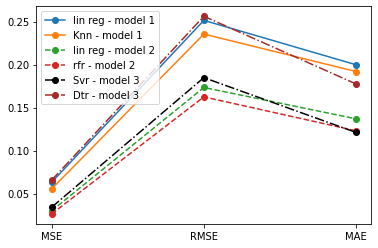

In [76]:
point = np.array(['MSE', 'RMSE','MAE'])
point1 = np.array([MSE1, RMSE1, MAE1])
point2 = np.array([MSE2, RMSE2, MAE2])
point3 = np.array([MSE3, RMSE3, MAE3])
point4 = np.array([MSE4, RMSE4, MAE4])
point5 = np.array([MSE5, RMSE5, MAE5])
point6 = np.array([MSE6, RMSE6, MAE6])
plt.plot(point, point1,  label="lin reg - model 1", marker='o')
plt.plot(point, point2,  label="Knn - model 1", marker='o')
plt.plot(point, point3,  label="lin reg - model 2", linestyle="--", marker='o')
plt.plot(point, point4,  label="rfr - model 2", marker='o', linestyle="--")
plt.plot(point, point5,  label="Svr - model 3", linestyle="-.", marker='o',color='black')
plt.plot(point, point6,  label="Dtr - model 3", linestyle="-.", marker='o',color='brown')


plt.legend()
plt.show()